In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.decomposition import PCA

In [8]:
from sklearn.cluster import  KMeans

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
df =pd.read_csv('Mall_Customers.csv')

In [11]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [16]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(x)

In [17]:
scaled_df

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [18]:
# ####   optional 

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=principal_components,columns =['PCA1','PCA2'])

pca_df

,PCA1,PCA2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740
...,...,...
195,-1.093705,2.215577
196,0.800448,2.540748
197,-1.119709,2.445169
198,0.395411,2.946665


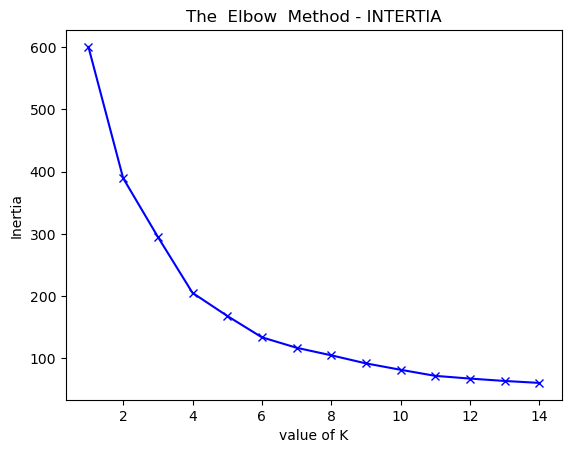

In [19]:
#Determine value oF k

inertia = []

range_val = range(1,15)

for i in range_val:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmeans.inertia_)

plt.plot(range_val,inertia,'bx-')
plt.xlabel('value of K')
plt.ylabel('Inertia')
plt.title('The  Elbow  Method - INTERTIA')
plt.show()

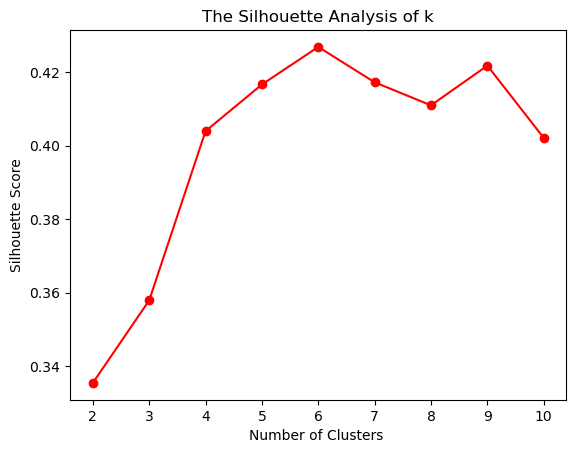

In [30]:
from calendar import c
from sklearn.metrics import silhouette_samples

sil_list =[]

for i in range (2,11):
    model = KMeans(n_clusters=i,init='k-means++')
    sil_list.append(silhouette_samples(scaled_df,model.fit_predict(scaled_df)).mean())
    
plt.plot(range(2,11),sil_list,c='r',marker='o')
plt.xlabel('Number of Clusters ')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Analysis of k')
plt.show()

In [31]:
kmeans_model = KMeans(5)

In [33]:
kmeans_model.fit_predict(scaled_df)

pca_d_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [34]:
pca_d_kmeans

,PCA1,PCA2,cluster
0,-0.615720,-1.763481,1
1,-1.665793,-1.820747,1
2,0.337862,-1.674799,0
3,-1.456573,-1.772430,1
4,-0.038465,-1.662740,1
...,...,...,...
195,-1.093705,2.215577,4
196,0.800448,2.540748,3
197,-1.119709,2.445169,4
198,0.395411,2.946665,3


Text(0.5, 1.0, 'Clusters of using K-MEANS')

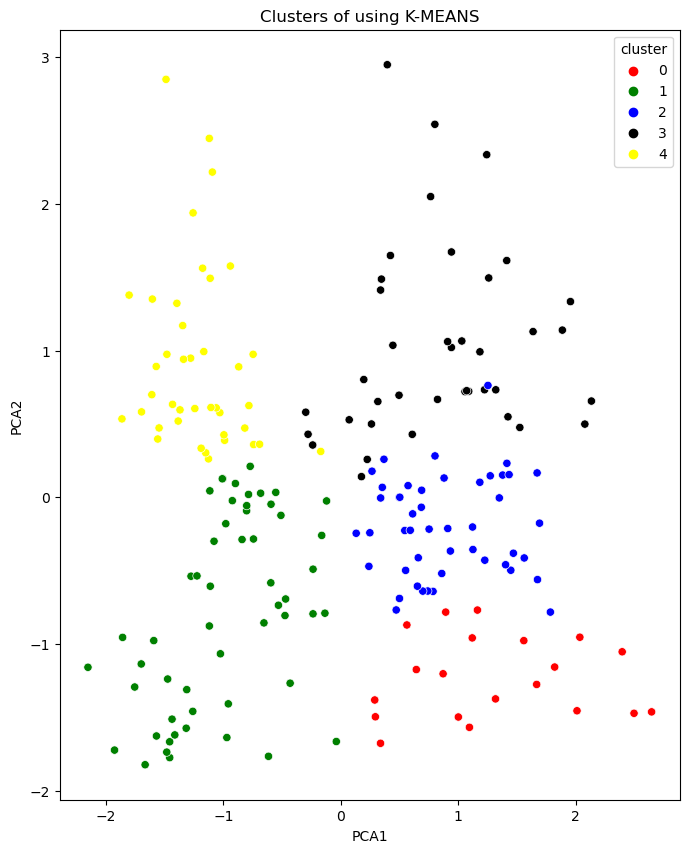

In [37]:
plt.figure(figsize=(8,10))

ax=sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_d_kmeans,palette=['red','green','blue','black','yellow'])

plt.title('Clusters of using K-MEANS')